In [ ]:
import pandas as pd
# Load your dataset
df = pd.read_csv("mapped_product_numbers_combined_flight_sales.csv")



# Filter the DataFrame to include only rows where 'ProductType' is 2
df_filtered = df[df['ProductNumber'] == 1]

# Keep only the desired columns
df_filtered = df_filtered[['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity', 'Passengers', 'STD_day', 'STD_month', 'Quantity','ProductNumber']]

# Drop rows with missing values
df_filtered = df_filtered.dropna()

# Convert to numpy arrays
x = df_filtered[['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity', 'Passengers', 'STD_day', 'STD_month','ProductNumber']].values
y = df_filtered['Quantity'].values




                  Passengers
DepartureStation    0.186928
ArrivalStation      0.174023
Destination_Type    0.219791
Origin_Type         0.187316
Capacity            0.017840
Passengers          0.192383
STD_day             0.004370
STD_month           0.017349
ProductNumber       0.000000


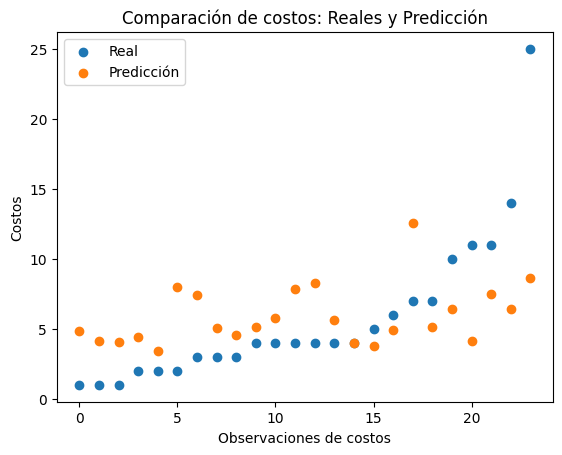

Mean Absolute Error (MAE): 2.90
Mean Absolute Percentage Error (MAPE): 94.47%


In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.ensemble import GradientBoostingRegressor


model_regression = GradientBoostingRegressor()
x_labels = ['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity', 'Passengers', 'STD_day', 'STD_month','ProductNumber']
c_label = ['Coeficientes']
from sklearn.linear_model import ElasticNet


model_regression.fit(x_train, y_train)

x_labels = ['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity', 'Passengers', 'STD_day', 'STD_month','ProductNumber']
c_label = ['Passengers']

coeff_df = pd.DataFrame(model_regression.feature_importances_, index=x_labels, columns=c_label)
print(coeff_df)

y_pred = model_regression.predict(x_test)

residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 24)
residuals = residuals.sort_values(by='Real')
residuals

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

plt.scatter(np.arange(24), residuals['Real'], label = "Real")
plt.scatter(np.arange(24), residuals['Predicción'], label = "Predicción")

plt.title("Comparación de costos: Reales y Predicción")

plt.xlabel("Observaciones de costos")

plt.ylabel("Costos")

plt.legend(loc='upper left')

plt.show() # desplegamos el gráfico
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(abs((y_test - y_pred) / y_test)) * 100

print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

In [ ]:
r2_score(y_test, y_pred)

0.3117046612053077

In [ ]:

df = pd.read_csv("mapped_flight_2023_no_null_without_bookings.csv")

flight_info = {}
for index, row in df.iterrows():
    flight_id = row['Flight_ID']
    info = row.drop(['Flight_ID', 'Aeronave', 'Passengers']).tolist()
    if flight_id not in flight_info:
        flight_info[flight_id] = []
    flight_info[flight_id].append(info)

def get_info_by_flight_id(flight_id):
    return flight_info.get(flight_id, "Flight ID not found")


In [ ]:

flight_id = input("Enter Flight ID: ")
print(get_info_by_flight_id(flight_id))

Enter Flight ID: cc445df3dab7fa57a8773bff0509c67e
[[3.0, 30.0, 5.0, 2.0, 240, 159.0, 2, 10]]


In [ ]:
custom_output = model_regression.predict(get_info_by_flight_id(flight_id))
print("Predicted output:", custom_output)

Predicted output: [238.92995064]
